In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

ROOT = 'data'
CLASS_NAME = sorted(list(os.listdir(f'{ROOT}/train')))


In [2]:
def read_image_from_path(path, size):
    im = Image.open(path).convert("RGB").resize(size)
    return np.array(im)


def folder_to_images(folder, size):
    list_dir = [folder + "/" + name for name in os.listdir(folder)]
    images_np = np.zeros(shape=(len(list_dir), *size, 3))
    images_path = []
    for i, path in enumerate(list_dir):
        images_np[i] = read_image_from_path(path, size)
        images_path.append(path)  # Now 'images_path' is a list, so append will work
    # After the loop, convert the list to a numpy array if needed
    images_path = np.array(images_path)
    return images_np, images_path

def plot_results(querquery_pathy, ls_path_score, reverse):
    fig = plt.figure(figsize=(15, 9))
    fig.add_subplot(2, 3, 1)
    plt.imshow(read_image_from_path(querquery_pathy, size=(448, 448)))
    plt.title(f"Query Image: {querquery_pathy.split('/')[2]}", fontsize=16)
    plt.axis("off")
    for i, path in enumerate(
        sorted(ls_path_score, key=lambda x: x[1], reverse=reverse)[:5], 2
    ):
        fig.add_subplot(2, 3, i)
        plt.imshow(read_image_from_path(path[0], size=(448, 448)))
        plt.title(f"Top {i-1}: {path[0].split('/')[2]}", fontsize=16)
        plt.axis("off")
    plt.show()

In [3]:
def absolute_difference(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    return np.sum(np.abs(data - query), axis=axis_batch_size)


def get_l1_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            rates = absolute_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

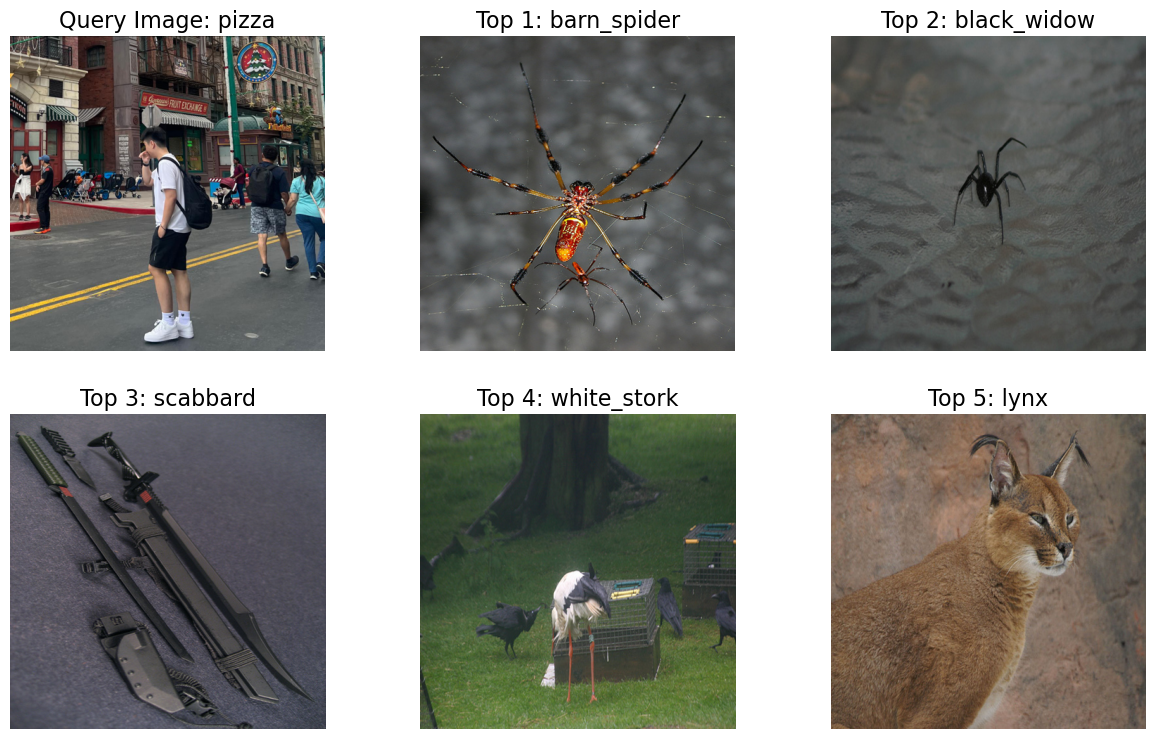

In [13]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/pizza/3.jpg"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

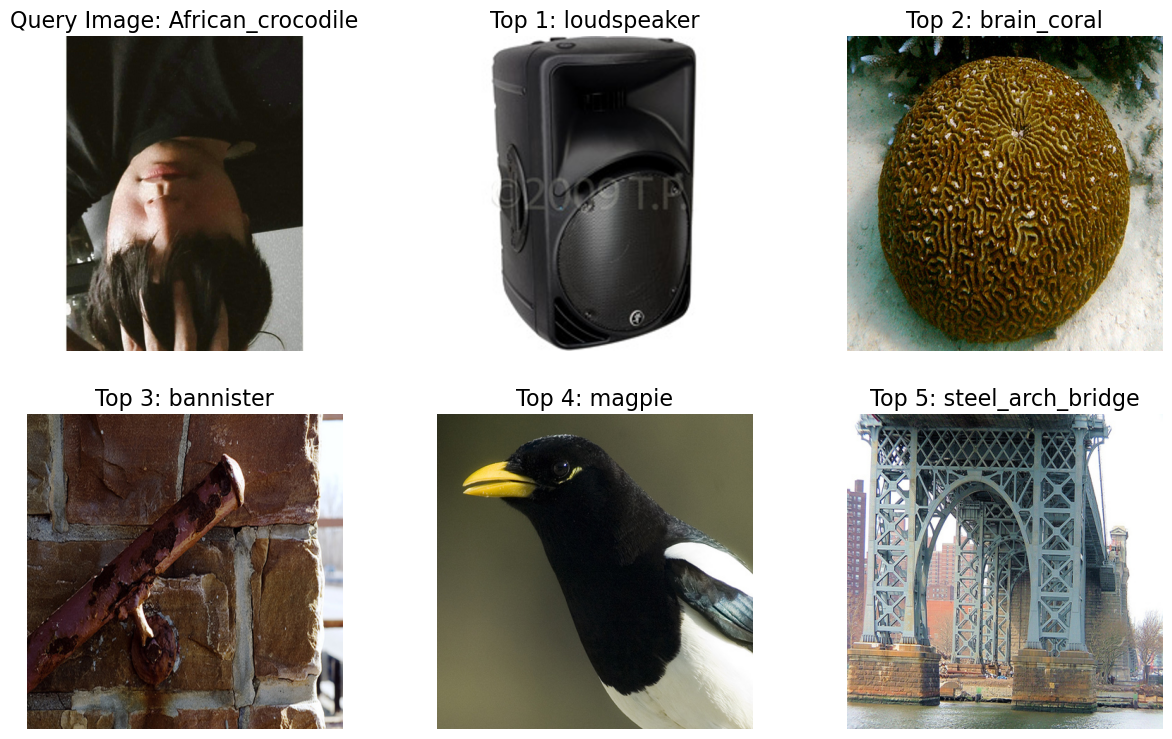

In [14]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/idk.JPG"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)